# **Ship Detection in Satellite Images**

## Dataset

The dataset consists of image chips extracted from Planet satellite imagery collected over the San Francisco Bay and San Pedro Bay areas of California. It includes 4000 80x80 RGB images labeled with either a "ship" or "no-ship" classification. Image chips were derived from PlanetScope full-frame visual scene products, which are orthorectified to a 3 meter pixel size.

Its a binary image classification model which can be solved with a simple
CNN model (that at least has the capacity to solve MNIST)

![Ship Class](https://i.imgur.com/tLsSoTz.png)

Above, we can see examples of images that belong to the class "Ships", which is a positive class for this dataset.

![No Ships class](https://imgur.com/Q3daQMC.png)

In this image are all the examples that belong to the "No-Ships" class where we can see half-ships, land, water and every other possible object seen from satellite images of bay area.

### Install Kaggle and download dataset

In [5]:
!pip install kaggle

In [0]:
import json
token = {"username":"ashwinvasan1","key":"0e2278b6779877b9e1c8f6c1849e94f1"}
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)

In [8]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [10]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d rhammell/ships-in-satellite-imagery -p /content/

 87% 161M/185M [00:03<00:00, 39.5MB/s]
100% 185M/185M [00:03<00:00, 52.2MB/s]


## Model Building and Training

In [0]:
# import all necessary libraries

import numpy as np
import json, sys, random
from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt

# import all Keras related libraries
import keras.callbacks
from keras.optimizers import SGD
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Activation, Dropout


In [0]:
!unzip \*.zip

In [0]:
# get data from json object
f = open(r'shipsnet.json')
dataset = json.load(f)
f.close()

In [0]:
# Get X, y from dataset object
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [0]:
# Set the correct data shapes and visualize the input
X = input_data.reshape([-1, 3, 80, 80])

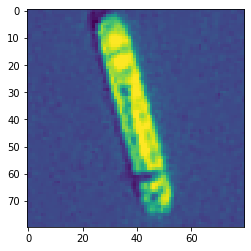

In [21]:
picture = X[100]

# Visualizing one channel
plt.imshow(picture[0])
plt.show()

Normalize data and do one-hot encoding of output vector!

In [0]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

# shuffle all indexes
shuffle_indices = np.arange(2800)
np.random.shuffle(shuffle_indices)

# get the final training data
X_train = X[shuffle_indices].transpose([0,2,3,1])
y_train = y[shuffle_indices]

# normalize
X_train = X_train / 255

In [0]:
np.random.seed(50)

Start Training.....

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [31]:
# begin training for 50 epochs
history = model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/50
 - 2s - loss: 0.4151 - acc: 0.8089 - val_loss: 0.3895 - val_acc: 0.8839
Epoch 2/50
 - 1s - loss: 0.1772 - acc: 0.9411 - val_loss: 0.1327 - val_acc: 0.9571
Epoch 3/50
 - 1s - loss: 0.0993 - acc: 0.9665 - val_loss: 0.0787 - val_acc: 0.9768
Epoch 4/50
 - 1s - loss: 0.0927 - acc: 0.9701 - val_loss: 0.0859 - val_acc: 0.9679
Epoch 5/50
 - 1s - loss: 0.0630 - acc: 0.9817 - val_loss: 0.0501 - val_acc: 0.9857
Epoch 6/50
 - 1s - loss: 0.0455 - acc: 0.9853 - val_loss: 0.0683 - val_acc: 0.9714
Epoch 7/50
 - 1s - loss: 0.0398 - acc: 0.9857 - val_loss: 0.0445 - val_acc: 0.9911
Epoch 8/50
 - 1s - loss: 0.0229 - acc: 0.9942 - val_loss: 0.0391 - val_acc: 0.9875
Epoch 9/50
 - 1s - loss: 0.0274 - acc: 0.9902 - val_loss: 0.0261 - val_acc: 0.9911
Epoch 10/50
 - 1s - loss: 0.0283 - acc: 0.9915 - val_loss: 0.0327 - val_acc: 0.9893
Epoch 11/50
 - 1s - loss: 0.0216 - acc: 0.9938 - val_loss: 0.0449 - val_acc: 0.9857
Epoch 12/50
 - 1s - loss: 0.0209 - acc

In [32]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


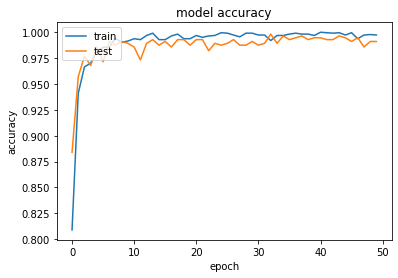

In [33]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

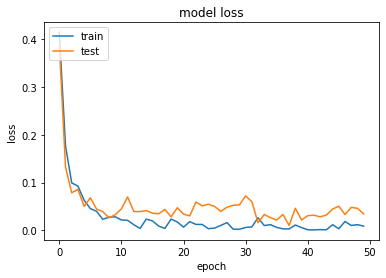

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Hyperparameter Optimization

Looks like our learning rate of 0.001 performs well. Andrew Ng mentions in his slides that we should explore learning rates in steps of 3. Other learning rates we can try are 0.003, 0.01.

Looks like epochs=50 is good for lower learning rates, but for higher learning rates we could use lesser number of epochs since training has already stabilised around 25 epochs

Running expriment for: <br>
**Learning Rate = 0.01** <br>
**Epochs = 25**

In [0]:
np.random.seed(10)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [0]:
from keras.optimizers import Adam

In [0]:
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])

In [42]:
# begin training for 25 epochs
history = model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/25
 - 2s - loss: 0.4799 - acc: 0.8433 - val_loss: 0.1154 - val_acc: 0.9571
Epoch 2/25
 - 1s - loss: 0.2043 - acc: 0.9326 - val_loss: 0.1494 - val_acc: 0.9464
Epoch 3/25
 - 1s - loss: 0.2303 - acc: 0.9232 - val_loss: 0.1118 - val_acc: 0.9554
Epoch 4/25
 - 1s - loss: 0.2515 - acc: 0.9237 - val_loss: 0.1192 - val_acc: 0.9536
Epoch 5/25
 - 1s - loss: 0.1458 - acc: 0.9585 - val_loss: 0.1311 - val_acc: 0.9554
Epoch 6/25
 - 1s - loss: 0.1093 - acc: 0.9665 - val_loss: 0.4776 - val_acc: 0.8500
Epoch 7/25
 - 1s - loss: 0.1239 - acc: 0.9634 - val_loss: 0.0755 - val_acc: 0.9821
Epoch 8/25
 - 1s - loss: 0.0846 - acc: 0.9746 - val_loss: 0.0611 - val_acc: 0.9821
Epoch 9/25
 - 1s - loss: 0.1197 - acc: 0.9634 - val_loss: 0.1096 - val_acc: 0.9732
Epoch 10/25
 - 1s - loss: 0.1114 - acc: 0.9701 - val_loss: 0.9070 - val_acc: 0.6804
Epoch 11/25
 - 1s - loss: 0.1348 - acc: 0.9522 - val_loss: 0.1035 - val_acc: 0.9536
Epoch 12/25
 - 1s - loss: 0.0920 - acc

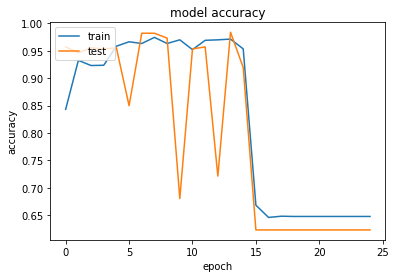

In [43]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This is a classic example of learning rate being "too high". The parameter updates are too high and the classifier is thrown off the local minima space and thus loss increases and accuracy goes down, never to recover again.

Thus we need to do a better job of searching for a good learning rate. Although the default learning rate of 0.001 in Adam Optimizer in first experiment looks perfect already!

Running expriment for: <br>
**Learning Rate = 0.003** <br>
**Epochs = 50**

In [0]:
np.random.seed(20)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [0]:
adam = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])

In [46]:
# begin training for 50 epochs
history = model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/50
 - 2s - loss: 0.6394 - acc: 0.6786 - val_loss: 0.2423 - val_acc: 0.9054
Epoch 2/50
 - 1s - loss: 0.2391 - acc: 0.9188 - val_loss: 0.1126 - val_acc: 0.9571
Epoch 3/50
 - 1s - loss: 0.1424 - acc: 0.9504 - val_loss: 0.1211 - val_acc: 0.9625
Epoch 4/50
 - 1s - loss: 0.1526 - acc: 0.9616 - val_loss: 0.2586 - val_acc: 0.8964
Epoch 5/50
 - 1s - loss: 0.0834 - acc: 0.9701 - val_loss: 0.0349 - val_acc: 0.9911
Epoch 6/50
 - 1s - loss: 0.0583 - acc: 0.9795 - val_loss: 0.0314 - val_acc: 0.9929
Epoch 7/50
 - 1s - loss: 0.0669 - acc: 0.9795 - val_loss: 0.0458 - val_acc: 0.9839
Epoch 8/50
 - 1s - loss: 0.0454 - acc: 0.9848 - val_loss: 0.0369 - val_acc: 0.9893
Epoch 9/50
 - 1s - loss: 0.0457 - acc: 0.9835 - val_loss: 0.0317 - val_acc: 0.9929
Epoch 10/50
 - 1s - loss: 0.0328 - acc: 0.9893 - val_loss: 0.0216 - val_acc: 0.9911
Epoch 11/50
 - 1s - loss: 0.0317 - acc: 0.9906 - val_loss: 0.0321 - val_acc: 0.9911
Epoch 12/50
 - 1s - loss: 0.0368 - acc

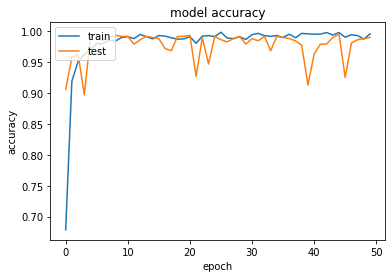

In [47]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

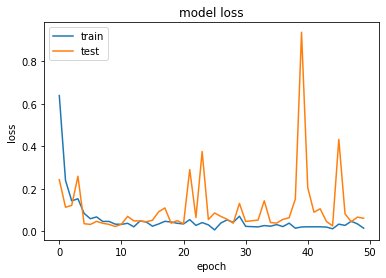

In [48]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Looks like our learning rate = 0.003 might be the best model, giving us convergence in less than 10 epochs!

It does seem like keeping on training for more epochs lets to some big parameter updates that throws the optimizer from the local minima but it always manages to find the optimum space again!

I think we should now get our best model from learning_rate=0.003, epochs=10

## Best Model

After our hyperparameters optimization, we theorized that we might get the best model performance with:

**Learning Rate = 0.003** <br>
**Epochs = 10**

In [0]:
np.random.seed(30)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [0]:
adam = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])

In [51]:
# begin training for 10 epochs
history = model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 2240 samples, validate on 560 samples
Epoch 1/10
 - 2s - loss: 0.3850 - acc: 0.8348 - val_loss: 0.1298 - val_acc: 0.9464
Epoch 2/10
 - 1s - loss: 0.1698 - acc: 0.9424 - val_loss: 0.1589 - val_acc: 0.9536
Epoch 3/10
 - 1s - loss: 0.1367 - acc: 0.9545 - val_loss: 0.1796 - val_acc: 0.9500
Epoch 4/10
 - 1s - loss: 0.1016 - acc: 0.9683 - val_loss: 0.0577 - val_acc: 0.9821
Epoch 5/10
 - 1s - loss: 0.0721 - acc: 0.9772 - val_loss: 0.0498 - val_acc: 0.9839
Epoch 6/10
 - 1s - loss: 0.0470 - acc: 0.9835 - val_loss: 0.0322 - val_acc: 0.9946
Epoch 7/10
 - 1s - loss: 0.1178 - acc: 0.9656 - val_loss: 0.1184 - val_acc: 0.9714
Epoch 8/10
 - 1s - loss: 0.0605 - acc: 0.9839 - val_loss: 0.0469 - val_acc: 0.9893
Epoch 9/10
 - 1s - loss: 0.0389 - acc: 0.9866 - val_loss: 0.0654 - val_acc: 0.9839
Epoch 10/10
 - 1s - loss: 0.0362 - acc: 0.9875 - val_loss: 0.0696 - val_acc: 0.9786


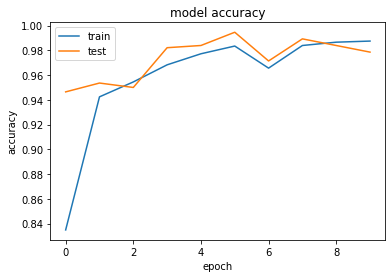

In [52]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

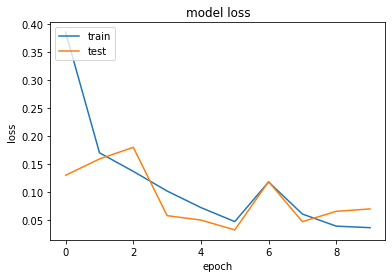

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Thats great! Looks like we got near 98 percent accuracy with just 10 epochs of training and 20 seconds of training time!

Now lets try to visualize the trained model. Borrowing framework code from the Kaggle kernel:

[link text](https://www.kaggle.com/byrachonok/keras-for-search-ships-in-satellite-image)

## Visualizing Predictions!

In [0]:
image = Image.open('scenes/scenes/sfbay_1.png')
pix = image.load()

In [0]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

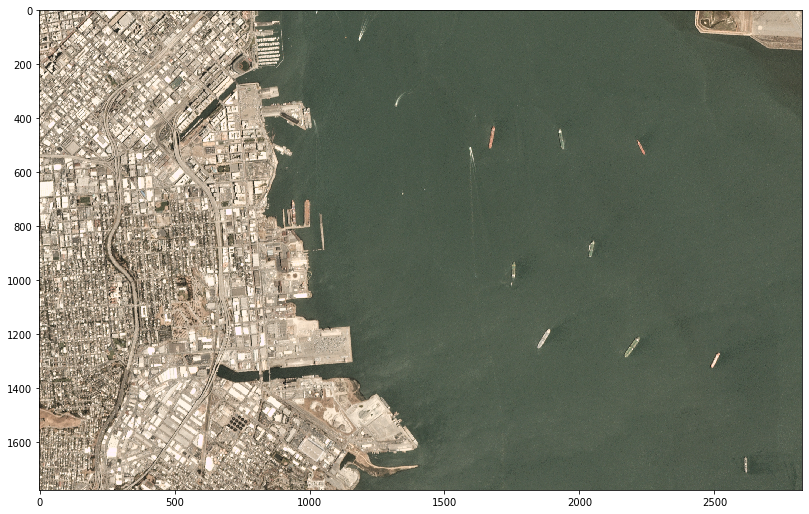

In [60]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [0]:
picture_tensor = picture_tensor.transpose(2,0,1)


In [0]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study
  
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result
  
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:1640 Y:410  [[0.02990468 0.9700953 ]]


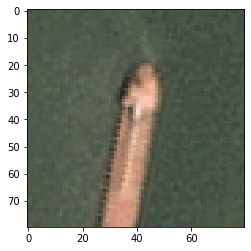

X:1890 Y:420  [[0.05145962 0.94854033]]


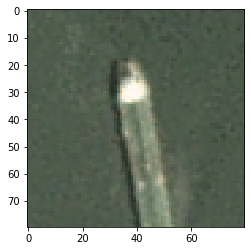

X:2190 Y:470  [[7.360769e-05 9.999263e-01]]


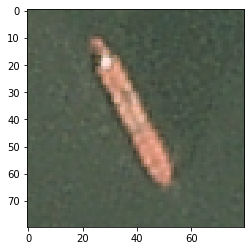

X:900 Y:680  [[0.04629118 0.95370877]]


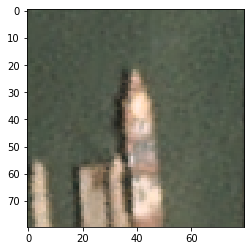

X:1010 Y:780  [[0.05065714 0.94934285]]


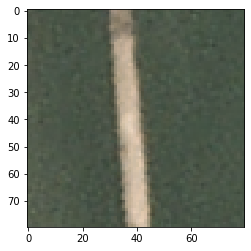

X:1720 Y:920  [[0.0054584 0.9945416]]


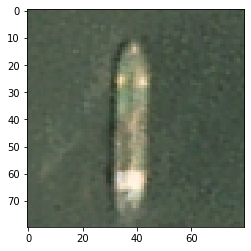

X:1830 Y:1170  [[0.0960613 0.9039387]]


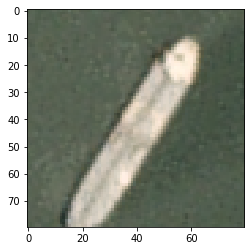

X:2170 Y:1190  [[0.09435558 0.90564436]]


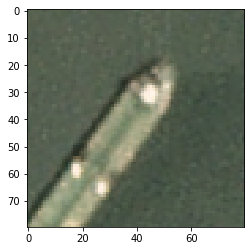

X:2460 Y:1260  [[0.02851843 0.97148156]]


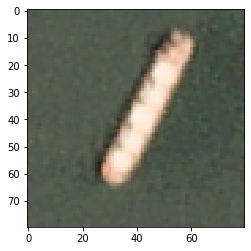

X:1340 Y:1540  [[0.07904877 0.92095125]]


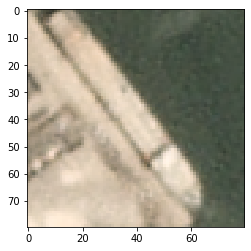

X:2580 Y:1640  [[0.03948424 0.9605158 ]]


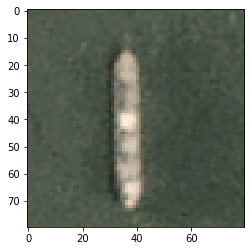

X:2740 Y:1690  

In [63]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

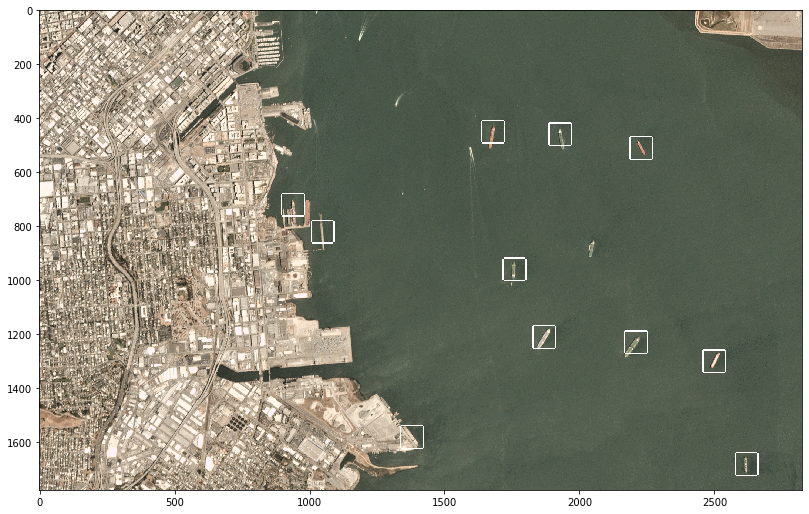

In [64]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

picture_tensor = picture_tensor.transpose(1,2,0)

plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()

## Final Prediction

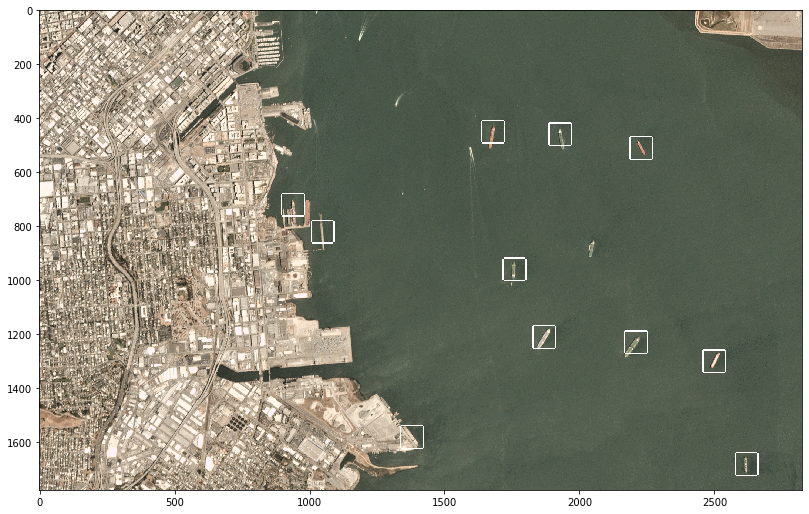

In [65]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()